In [ ]:
import pandas as pd
import os

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("/content/drive/MyDrive/Sales_Data/")]

all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv("/content/drive/MyDrive/Sales_Data/" + file)
  all_months_data = pd.concat([all_months_data,df])

In [ ]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
all_months_data.to_csv("all_data.csv")

In [ ]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
##Clean up the data!
all_data.isnull().sum()
all_data = all_data.dropna(how = "all")
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
##Find 'Or and delete it
all_data = all_data[all_data['Order Date'].str[0:2 ] != 'or']


In [ ]:
##Columns to the correct types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce') #make Float
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce') #make Float
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
##Add a Month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


In [ ]:
all_data.tail()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,20374,278792,AA Batteries (4-pack),1.0,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10
186846,20375,278793,Wired Headphones,1.0,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10
186847,20376,278794,AA Batteries (4-pack),1.0,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10
186848,20377,278795,iPhone,1.0,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10
186849,20378,278796,Wired Headphones,1.0,11.99,10/13/19 11:20,"547 Jefferson St, Los Angeles, CA 90001",10


what was the best month for sale?
how much was earned that month?

In [ ]:
##Add a sales column
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype(float)
all_data["sales"] = all_data["Quantity Ordered"]* all_data["Price Each"]
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08,23.98
1,1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08,99.99
2,2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08,700.00
3,3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08,7.68
4,4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08,7.68


In [ ]:
##Add a city column
def get_city(address):
  if ',' in address:
    return address.split(',')[1]
  else:
    return None

all_data['city'] = all_data['Purchase Address'].astype(str).apply(lambda x: get_city(x))
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,column,city
0,0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08,23.98,Seattle,Seattle
1,1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08,99.99,Dallas,Dallas
2,2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08,700.00,Portland,Portland
3,3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08,7.68,Los Angeles,Los Angeles
4,4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08,7.68,New York City,New York City


In [ ]:
all_data.drop(columns = "column")

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08,23.98,Seattle
1,1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08,99.99,Dallas
2,2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08,700.00,Portland
3,3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08,7.68,Los Angeles
4,4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08,7.68,New York City
...,...,...,...,...,...,...,...,...,...,...
186845,20374,278792,AA Batteries (4-pack),1.0,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,3.84,San Francisco
186846,20375,278793,Wired Headphones,1.0,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99,Los Angeles
186847,20376,278794,AA Batteries (4-pack),1.0,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,3.84,San Francisco
186848,20377,278795,iPhone,1.0,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,700.00,Seattle


In [ ]:
result = all_data.groupby('Month').sum()

<ipython-input-30-e54d6b24dac6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby('Month').sum()


<function matplotlib.pyplot.show(close=None, block=None)>

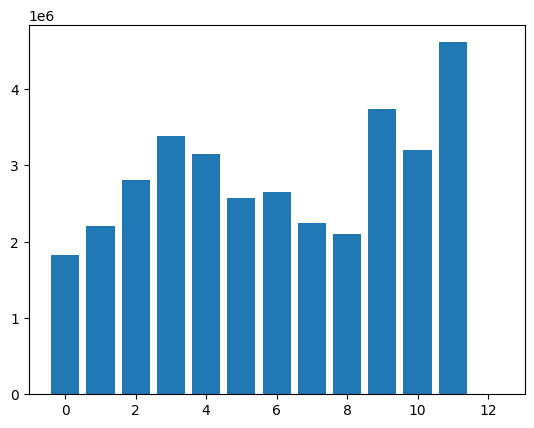

In [ ]:
import matplotlib.pyplot as plt

months = range(0,13)

plt.bar(months,result['sales'])
plt.show

which US city has highest number of sales?

In [ ]:
results = all_data.groupby('city').sum()

<ipython-input-32-8d6cf81db353>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('city').sum()


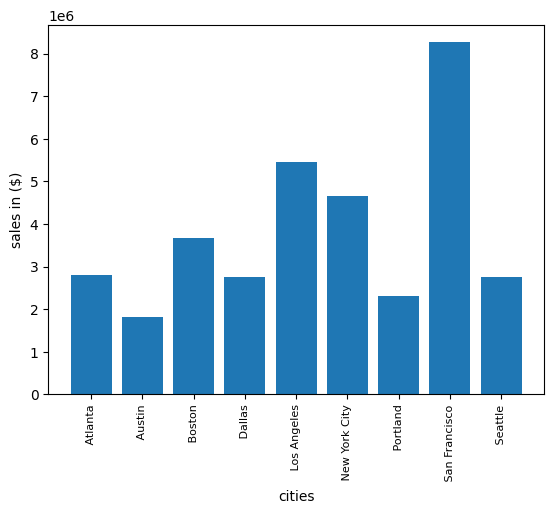

In [ ]:
import matplotlib.pyplot as plt

cities = all_data["city"].unique()
cities = [city for city, df in all_data.groupby('city')]
plt.bar(cities, results['sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel("sales in ($)")
plt.xlabel("cities")
plt.show()

what time should we display advertisment to maximize liklihood of customer's buying product?

In [ ]:
all_data['Order Date'] = all_data['Order Date'].str.replace('Order Date', '')
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [ ]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,column,city
0,0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",08,23.98,Seattle,Seattle
1,1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",08,99.99,Dallas,Dallas
2,2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",08,700.00,Portland,Portland
3,3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",08,7.68,Los Angeles,Los Angeles
4,4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",08,7.68,New York City,New York City


In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,column,city,Hour
0,0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",08,23.98,Seattle,Seattle,22.0
1,1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",08,99.99,Dallas,Dallas,15.0
2,2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",08,700.00,Portland,Portland,14.0
3,3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",08,7.68,Los Angeles,Los Angeles,20.0
4,4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",08,7.68,New York City,New York City,19.0


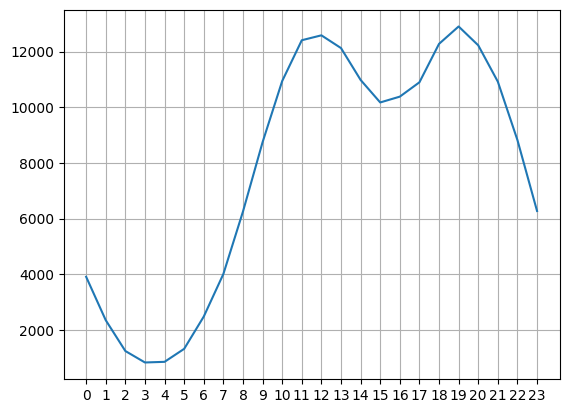

In [ ]:
Hours = [Hour for Hour, df in all_data.groupby('Hour')]

plt.plot(Hours, all_data.groupby('Hour').size())
plt.xticks(Hours)
plt.grid()
plt.show()

In [ ]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','. join (x))
df.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Grouped
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",34in Ultrawide Monitor
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",27in 4K Gaming Monitor
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",AAA Batteries (4-pack)
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",27in FHD Monitor
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",Wired Headphones
5,259363,AAA Batteries (4-pack),1,2.99,10/01/19 18:55,"976 Lake St, New York City, NY 10001",AAA Batteries (4-pack)
6,259364,Wired Headphones,1,11.99,10/29/19 11:02,"874 North St, Los Angeles, CA 90001",Wired Headphones
7,259365,Lightning Charging Cable,1,14.95,10/29/19 11:19,"127 12th St, Los Angeles, CA 90001",Lightning Charging Cable
8,259366,Apple Airpods Headphones,1,150.0,10/20/19 11:52,"955 9th St, Los Angeles, CA 90001",Apple Airpods Headphones
9,259367,Apple Airpods Headphones,1,150.0,10/16/19 16:19,"742 14th St, San Francisco, CA 94016",Apple Airpods Headphones
